In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

## Reading the CSV file

In [2]:
df = pd.read_csv("HFCR.csv") #Reading the CSV file
df.head(5) #displaying first 4 rows in the dataset

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


## Features and Labels

In [3]:
X = df.drop(columns=["DEATH_EVENT"]).values
y = df['DEATH_EVENT'].values
min_max_scaler = MinMaxScaler()
X = min_max_scaler.fit_transform(X)
print("Feature set shape: ", X.shape)
print("Label set shape: ", y.shape)

Feature set shape:  (299, 12)
Label set shape:  (299,)


## Feature selction using Chi-square statictics test

In [4]:
# Feature extraction
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X, y)

# Summarize scores
np.set_printoptions(precision=3)
for i in range(len(df.columns[:-1])):
  print(df.columns[i],fit.scores_[i]) #this displays each feature with the score for that feature

age 2.368845565076014
anaemia 0.7465934114891604
creatinine_phosphokinase 0.25202884625587363
diabetes 0.0006568144499178924
ejection_fraction 1.894515968581577
high_blood_pressure 1.221538529204786
platelets 0.035021363249140236
serum_creatinine 3.4716102972501637
serum_sodium 0.2673679291297085
sex 0.001956265975995817
smoking 0.032346828817734236
time 14.050285792119666


Age, anaemia, ejection_fraction, serum_creatinine, high_blood_pressure, time have the highest scores.

## Correlation matrix for further feature identification

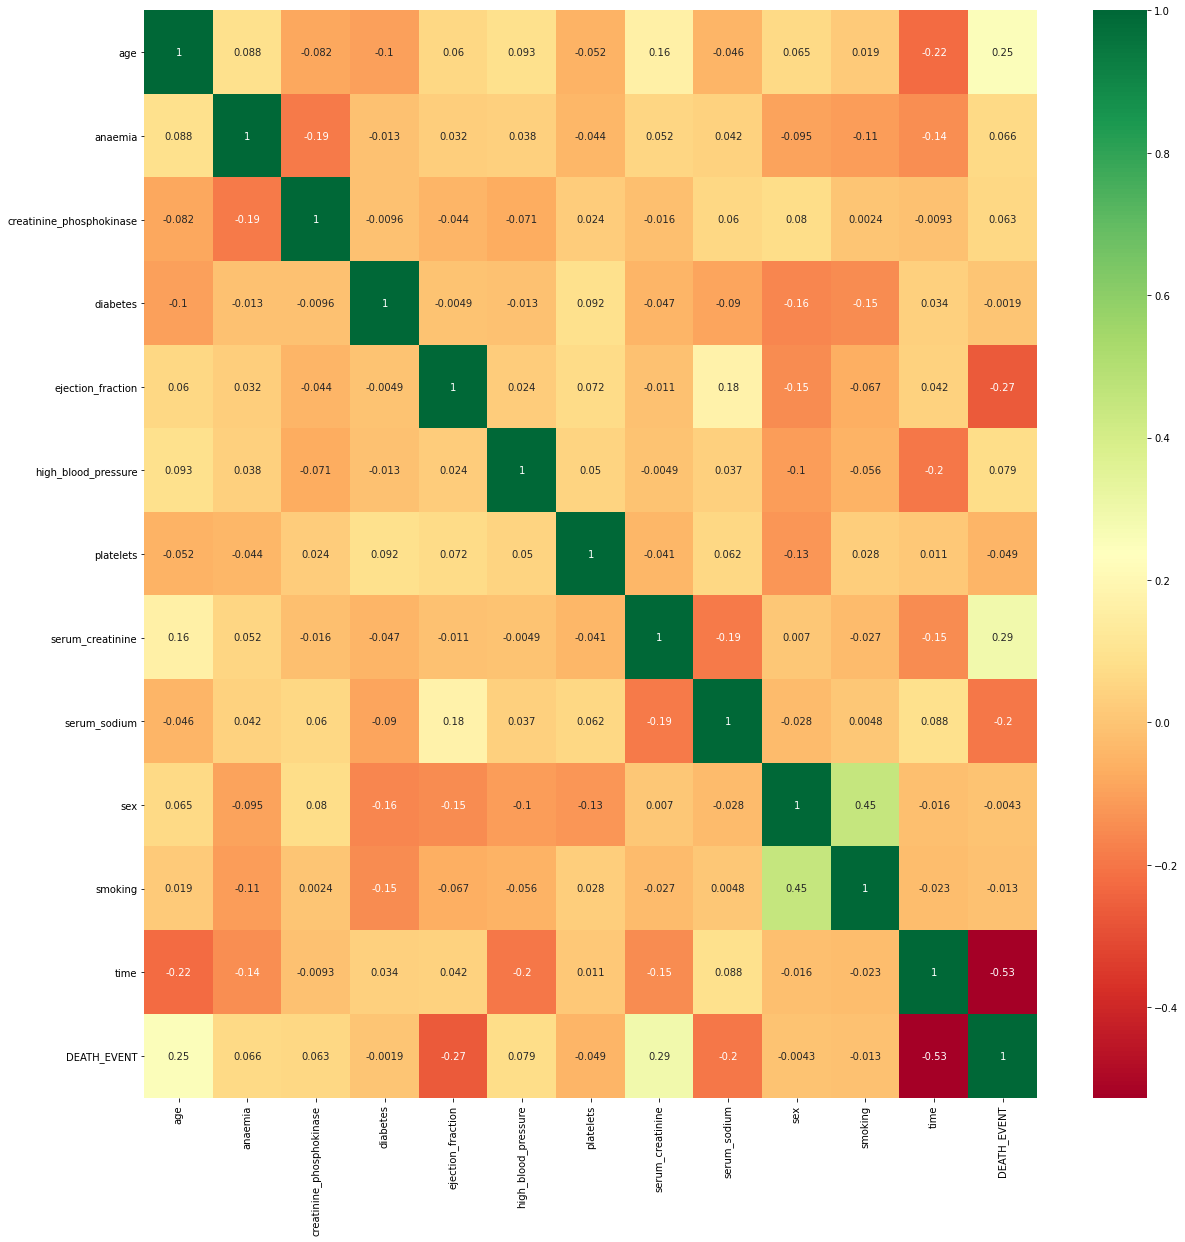

In [5]:
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df.corr(),annot=True,cmap="RdYlGn") #df.corr() generates the correlation matrix

## Selected Features

When observing the last row, we can see that DEATH_EVENT has a considerable correlation(negative or positive) with age, ejection_fraction, serum_creatininine, serum_sodium and time. This are the same features identified from chi-square test but high blood preessure has a low correlation value. However, we will keep that too.
Therefore, we neglect the other columns.

In [6]:
df_f = df[['age','ejection_fraction', 'serum_creatinine', 'serum_sodium','time','platelets', 'high_blood_pressure']]
df_f.head(5)

,age,ejection_fraction,serum_creatinine,serum_sodium,time,platelets,high_blood_pressure
0,75.0,20,1.9,130,4,265000.00,1
1,55.0,38,1.1,136,6,263358.03,0
2,65.0,20,1.3,129,7,162000.00,0
3,50.0,20,1.9,137,7,210000.00,0
4,65.0,20,2.7,116,8,327000.00,0


In [7]:
X = df_f.values #returns a numpy array
min_max_scaler = MinMaxScaler() #Scaling the new feature set
X = min_max_scaler.fit_transform(X)

## Train set and test set

We use 70% of the dataset for training and 30% for testing

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, df['DEATH_EVENT'].values, test_size=0.3, shuffle=True)

## Decision Tree Classifier

In [9]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [10]:
# Model Accuracy, how often is the classifier correct?
print("Decision tree accuracy:",metrics.accuracy_score(y_test, y_pred)*100)

Decision tree accuracy: 77.77777777777779


## K-Nearest Neighbour

In [11]:
#Identifying elbow
accuracy = []
best_knn =None
prev_acc = 0
best_k = 0
k_range = [i for i in range(3,15)]
for i in k_range:
  KNN = KNeighborsClassifier(n_neighbors=i)

  # Train the model using the training sets
  KNN.fit(X_train, y_train)

  #Predict Output
  y_pred_knn= KNN.predict(X_test)
  curr_acc = metrics.accuracy_score(y_test, y_pred_knn)*100
  accuracy.append(curr_acc)
  if prev_acc<curr_acc:
    best_knn = KNN
    best_k = i
  prev_acc = curr_acc
print('Best K value: ',best_k)

Best K value:  13


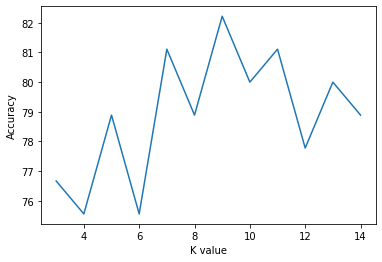

In [12]:
plt.figure()
plt.xlabel('K value')
plt.ylabel('Accuracy')
plt.plot(k_range, accuracy)
plt.show()

In [13]:
knn = best_knn
y_pred_knn = knn.predict(X_test)
print("Decision tree accuracy:",metrics.accuracy_score(y_test, y_pred_knn)*100)

Decision tree accuracy: 80.0
